In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [0]:
!ls /content/drive/My\ Drive/colab



bkai00mp.ttf  jsonJieba-tran.json  pm2.5Taiwan.csv


In [0]:
# 環境初始化 (大約三至五分鐘)
! wget -O init_env.sh https://www.dropbox.com/s/6bnwn8u2hz19s59/init_env.sh && \
bash init_env.sh

--2019-10-26 07:28:21--  https://www.dropbox.com/s/6bnwn8u2hz19s59/init_env.sh
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/6bnwn8u2hz19s59/init_env.sh [following]
--2019-10-26 07:28:22--  https://www.dropbox.com/s/raw/6bnwn8u2hz19s59/init_env.sh
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4801c876d84cc5a51d65071c32.dl.dropboxusercontent.com/cd/0/inline/ArKFfPStr0CJ0qkhku9q9uzGj4f4vLWi1aQSmEyWPdURVapx-FJZxcBLQtOyIe4xTdKWv2kEIbYL73nqzBGhAIAC9OU4jyt_NzUtxGgSArmE8Q/file# [following]
--2019-10-26 07:28:22--  https://uc4801c876d84cc5a51d65071c32.dl.dropboxusercontent.com/cd/0/inline/ArKFfPStr0CJ0qkhku9q9uzGj4f4vLWi1aQSmEyWPdURVapx-FJZxcBLQtOyIe4xTdKWv2kEIbYL73nqzBGhAIAC9OU4jyt_NzUtxGgSArmE8Q/file
Resolving uc4801c876d8

In [0]:
import os, sys
os.environ['SPARK_HOME'] = "/usr/local/spark"
os.environ['PYSPARK_PYTHON'] = "/usr/local/bin/python"
sys.path.append("/usr/local/spark/python/")
sys.path.append("/usr/local/spark/python/lib/pyspark.zip")
sys.path.append("/usr/local/spark/python/lib/py4j-0.10.4-src.zip")

In [0]:
from pyspark import SparkContext
from pyspark import SparkConf
sc =SparkContext()

# 利用Spark 分析台灣2015 PM2.5資料集

<a id="load_data"></a>
## 上傳台灣2015一整年空氣監測資料 

### 步驟1: 將2015空氣監控資料，上傳至colab

In [0]:
!wget -O pm25.csv "https://www.dropbox.com/s/zkn3ba7pitv83el/pm2.5Taiwan.csv?dl=0"

--2019-10-26 07:28:28--  https://www.dropbox.com/s/zkn3ba7pitv83el/pm2.5Taiwan.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zkn3ba7pitv83el/pm2.5Taiwan.csv [following]
--2019-10-26 07:28:28--  https://www.dropbox.com/s/raw/zkn3ba7pitv83el/pm2.5Taiwan.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucada7fb014b00e32a47189d3ec7.dl.dropboxusercontent.com/cd/0/inline/ArIMLBR2FUsxFmv2-r46R_5wjRhkX-H7gmLhsOdLZnLCzIGtbI7-tyxbEZ21CGM5AJ6dvL1novc3B_8KpDbRNKHwmrgcOe4zm8vQqF8hcX6tFg/file# [following]
--2019-10-26 07:28:28--  https://ucada7fb014b00e32a47189d3ec7.dl.dropboxusercontent.com/cd/0/inline/ArIMLBR2FUsxFmv2-r46R_5wjRhkX-H7gmLhsOdLZnLCzIGtbI7-tyxbEZ21CGM5AJ6dvL1novc3B_8KpDbRNKHwmrgcOe4zm8vQqF8hcX6tFg/file
Resol

In [0]:
!ls

drive	init_env.sh  sample_data
drive0	pm25.csv     spark-2.2.0-bin-hadoop2.7.tgz


In [0]:
weather = sc.textFile("/content/drive/My\ Drive/colab/pm2.5Taiwan.csv")

### 步驟2: 試試看是否成功上傳  (使用count( ), first( ), collect( ), take( ) )

In [0]:
weather.count()
weather.first()

'日期,測站,測項,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23'

In [0]:
weather.take(5)

['日期,測站,測項,00,01,02,03,04,05,06,07,08,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23',
 '2015/01/01,龍潭,AMB_TEMP,14,14,14,13,13,13,12,12,13,14,14,14,14,14,13,13,12,11,11,11,11,11,11,11',
 '2015/01/01,龍潭,CO,0.69,0.72,0.69,0.64,0.54,0.47,0.45,0.48,0.51,0.54,0.54,0.5,0.47,0.38,0.36,0.35,0.34,0.37,0.34,0.29,0.26,0.22,0.19,0.18',
 '2015/01/01,龍潭,NO,0.3,0.1,0.6,2,2,1.9,2.2,3.1,3.7,4.3,4.3,4.5,3.3,4.1,3.1,3.6,3.6,2.8,2.8,2.5,2.2,1.4,2.1,2',
 '2015/01/01,龍潭,NO2,11,9.6,8.7,9.1,9.6,9.9,11,13,11,12,12,11,11,9.9,9.9,10,11,13,11,10,8.2,7.3,6.5,5.5']

# 練習1: 讓我們求取2015年，大里每小時的平均pm25數值。
## 注意事項：
1. 資料分割：原始資料每一行為一個觀測值，我們必須將資料進行分割，才能逐一計算與進行操作。
2. 資料清洗：在氣象局的原始資料裡，有些數值由於當初偵測時有異常，所以會加註特別符號如\*\#等特殊符號，這些數值我們必須先經過前處理，我們才能進行算術運算。
3. 資料選擇：將大里資料挑選出來
4. 產生key-value，也就是(小時,pm25值)
5. 利用flatMap(), reduceByKey(), groupByKey()，將不同日期但相同時間的pm25值收集起來。
6. 計算平均值, 標準差, 最大最小值。


### 步驟一：資料分割 (使用map () 與 split( ))

In [0]:
weatherParse = weather.map(lambda line : line.split(","))
print(weatherParse.first())

['日期', '測站', '測項', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']


### 步驟二：將大里站資料從全部資料集中挑選出來 (filter)

須留意unicode與string的差別,  u'大里'

In [0]:
wea_dali = weatherParse.filter(lambda x: x[1] == '大里' and x[2]== "PM2.5")
print(wea_dali.take(50))

[['2015/01/01', '大里', 'PM2.5', '53', '55', '58', '53', '43', '36', '35', '42', '55', '64', '65', '59', '52', '44', '47', '41', '43', '40', '42', '35', '28', '20', '18', '16'], ['2015/01/02', '大里', 'PM2.5', '21', '22', '26', '23', '20', '18', '15', '21', '21', '25', '29', '32', '34', '29', '32', '39', '51', '51', '47', '43', '43', '48', '47', '53'], ['2015/01/03', '大里', 'PM2.5', '48', '48', '43', '38', '37', '36', '37', '34', '37', '46', '64', '77', '83', '75', '68', '69', '64', '65', '59', '66', '71', '66', '57', '48'], ['2015/01/04', '大里', 'PM2.5', '60', '56', '53', '43', '53', '53', '52', '44', '44', '50', '49', '51', '45', '42', '40', '38', '36', '43', '51', '63', '68', '72', '66', '58'], ['2015/01/05', '大里', 'PM2.5', '48', '42', '42', '34', '34', '28', '34', '35', '45', '47', '54', '46', '35', '19', '16', '21', '24', '28', '37', '52', '60', '62', '64', '61'], ['2015/01/06', '大里', 'PM2.5', '59', '40', '34', '25', '27', '29', '26', '33', '42', '47', '38', '24', '14', '8', '17', '30',

### 步驟三：資料清洗 (使用 map(), str.strip())
#### 在氣象局的原始資料裡，有些數值由於當初偵測時有異常，所以會加註特別符號如\*\#等特殊符號，或者沒有取到數值為一空值，這些數值我們必須先經過前處理，我們才能進行算術運算。
1. ```2015/01/29 大里 PM2.5 14 14 12 7 1 0 4 6 12 16 15  52x 38x 30 29 27 29 24 24 21 19 19 23```
2. ```2015/01/16 大里 PM2.5 16 15 17 16 16 13 5 10 14 30 30 25 -4# 22 23 30 33 40 43 45 37 34 38 43``` 

In [0]:
def strip_symbol(x):
    for i in range(len(x)):
        #x[i] = x[i].strip("-*#x") # remove non-digits
        if "#" in x[i]:x[i] = "0"
        if "*" in x[i]:x[i] = "0"
        if "x" in x[i]:x[i] = "0"
        if "-" in x[i]:x[i] = "0"
        if x[i] == "": x[i] = "0"
    return x

wea_dali = wea_dali.map(strip_symbol)

### 步驟四：key value pair的產生 (重要的操作概念)
*將每小時資料轉成(小時,pm數值)，以求取每小時的平均值。

例如：
    2015/01/01 大里 PM2.5 53 55 58 53 43 36 35 42 55 64 65 59 52 44 47 41 43 40 42 35 28 20 18 16
    --> [(0, 53) (1, 55) (2, 58) (3, 53) (4, 43) ... (21, 20) (22, 18) (23, 16)]


In [0]:
print(wea_dali.first())

['2015/01/01', '大里', 'PM2.5', '53', '55', '58', '53', '43', '36', '35', '42', '55', '64', '65', '59', '52', '44', '47', '41', '43', '40', '42', '35', '28', '20', '18', '16']


In [0]:
def hourKeyGen(x):
    hourkeypair = []
    x=x[3:]
    for i, value in enumerate(x):
      print(i, value)
      hourkeypair.append((i, float(value)))
    return hourkeypair

wea_dali_byHourkey = wea_dali.map(hourKeyGen)

wea_dali_byHourkey.first()

[(0, 53.0),
 (1, 55.0),
 (2, 58.0),
 (3, 53.0),
 (4, 43.0),
 (5, 36.0),
 (6, 35.0),
 (7, 42.0),
 (8, 55.0),
 (9, 64.0),
 (10, 65.0),
 (11, 59.0),
 (12, 52.0),
 (13, 44.0),
 (14, 47.0),
 (15, 41.0),
 (16, 43.0),
 (17, 40.0),
 (18, 42.0),
 (19, 35.0),
 (20, 28.0),
 (21, 20.0),
 (22, 18.0),
 (23, 16.0)]

### 步驟五： 利用flatMap(), reduceByKey(), groupByKey()，將不同日期但相同時間的pm25值收集起來。(使用flatMap)

In [0]:
byHourkey = wea_dali.flatMap(hourKeyGen)
byHourkey.reduceByKey(lambda x,y: x+y).take(10)

[(0, 9487.0),
 (2, 8630.0),
 (4, 7794.0),
 (6, 7499.0),
 (8, 8859.0),
 (10, 10235.0),
 (12, 11113.0),
 (14, 9996.0),
 (16, 9991.0),
 (18, 10040.0)]

### 步驟六： 計算大里區每個小時區間中，平均之pm25數值 (使用reduceByKey)

In [0]:
avg_pm25_hour = byHourkey.reduceByKey(lambda x,y: x+y)
avg_pm25_hour.map(lambda x:(x[0],x[1]/365)).collect()

[(0, 25.991780821917807),
 (2, 23.643835616438356),
 (4, 21.353424657534248),
 (6, 20.545205479452054),
 (8, 24.27123287671233),
 (10, 28.041095890410958),
 (12, 30.446575342465753),
 (14, 27.386301369863013),
 (16, 27.372602739726027),
 (18, 27.506849315068493),
 (20, 29.295890410958904),
 (22, 28.0986301369863),
 (1, 25.013698630136986),
 (3, 22.65205479452055),
 (5, 20.684931506849313),
 (7, 21.91780821917808),
 (9, 26.704109589041096),
 (11, 28.835616438356166),
 (13, 29.578082191780823),
 (15, 27.293150684931508),
 (17, 27.427397260273974),
 (19, 28.202739726027396),
 (21, 28.791780821917808),
 (23, 26.726027397260275)]

### 步驟七： 根據pm25平均濃度，進行排序。使用top( )

In [0]:
avg_pm25_hour = byHourkey.reduceByKey(lambda x,y: x+y)
avg_pm25_hour.map(lambda x:(x[0],x[1]/365.0)).map(lambda x: (x[1],x[0])).top(24)

[(30.446575342465753, 12),
 (29.578082191780823, 13),
 (29.295890410958904, 20),
 (28.835616438356166, 11),
 (28.791780821917808, 21),
 (28.202739726027396, 19),
 (28.0986301369863, 22),
 (28.041095890410958, 10),
 (27.506849315068493, 18),
 (27.427397260273974, 17),
 (27.386301369863013, 14),
 (27.372602739726027, 16),
 (27.293150684931508, 15),
 (26.726027397260275, 23),
 (26.704109589041096, 9),
 (25.991780821917807, 0),
 (25.013698630136986, 1),
 (24.27123287671233, 8),
 (23.643835616438356, 2),
 (22.65205479452055, 3),
 (21.91780821917808, 7),
 (21.353424657534248, 4),
 (20.684931506849313, 5),
 (20.545205479452054, 6)]

### 步驟八： 計算每個時間點的統計值，例如最大值、最小值、平均值、標準差(使用 groupByKey()與mapValues())

In [0]:
import numpy as np

hour_stat_list = byHourkey.groupByKey().mapValues(list).collect()

for i in sorted(hour_stat_list):
    print (i[0],max(i[1]),min(i[1]),np.mean(i[1]),np.var(i[1]))

0 117.0 0.0 25.991780821917807 403.6958228560705
1 110.0 0.0 25.013698630136986 372.1395383749296
2 107.0 0.0 23.643835616438356 381.08410583599186
3 102.0 0.0 22.65205479452055 356.34742728466875
4 98.0 0.0 21.353424657534248 339.0394745730907
5 88.0 0.0 20.684931506849313 319.43771814599364
6 96.0 0.0 20.545205479452054 303.8041208481892
7 102.0 0.0 21.91780821917808 315.5822856070557
8 109.0 0.0 24.27123287671233 358.1647888909739
9 104.0 0.0 26.704109589041096 393.20012009757926
10 114.0 0.0 28.041095890410958 422.29146181272284
11 117.0 0.0 28.835616438356166 421.92914242822286
12 112.0 0.0 30.446575342465753 420.24714580596736
13 103.0 0.0 29.578082191780823 398.86308125351854
14 94.0 0.0 27.386301369863013 363.33844248451874
15 104.0 0.0 27.293150684931508 367.7140626759242
16 93.0 0.0 27.372602739726027 331.4063726778007
17 90.0 0.0 27.427397260273974 328.9789754175268
18 88.0 0.0 27.506849315068493 310.18967911428035
19 99.0 0.0 28.202739726027396 357.8273897541752
20 101.0 0.

# 練習2: 請求取2015年，全國pm2.5最高的前十個工作站測點以及其日期。

In [0]:
#get PM2.5 data in weatherParse
PM25 = weatherParse.filter(lambda x: x[2]== "PM2.5")
print(PM25.take(50))


[['2015/01/01', '龍潭', 'PM2.5', '46', '71', '76', '74', '65', '62', '56', '50', '52', '56', '54', '47', '40', '36', '37', '27', '30', '25', '26', '24', '18', '16', '11', '14'], ['2015/01/02', '龍潭', 'PM2.5', '15', '12', '9', '14', '17', '20', '18', '22', '21', '23', '18', '25', '24', '27', '18', '23', '18', '19', '18', '21', '23', '18', '19', '19'], ['2015/01/03', '龍潭', 'PM2.5', '14', '14', '9', '13', '12', '15', '9', '11', '14', '27', '27', '24', '16', '27', '38', '39', '35', '32', '38', '36', '34', '36', '36', '39'], ['2015/01/04', '龍潭', 'PM2.5', '42', '40', '39', '34', '33', '25', '24', '23', '31', '27', '34', '35', '35', '38', '46', '59', '53', '58', '61', '74', '80', '78', '70', '53'], ['2015/01/05', '龍潭', 'PM2.5', '42', '33', '24', '21', '20', '18', '16', '21', '21', '17', '13', '23', '36', '49', '61', '63', '68', '81', '91', '99', '76', '57', '34', '24'], ['2015/01/06', '龍潭', 'PM2.5', '19', '13', '11', '16', '11', '9', '6', '8', '8', '7', '11', '19', '33', '32', '34', '30', '32', 

In [0]:
#replace datas  which contain "-","*","#","x"," " with "0"
PM25 = PM25.map(strip_symbol)
print(PM25.first())

['2015/01/01', '龍潭', 'PM2.5', '46', '71', '76', '74', '65', '62', '56', '50', '52', '56', '54', '47', '40', '36', '37', '27', '30', '25', '26', '24', '18', '16', '11', '14']


In [0]:
#
def get_locationTime_PM(x):
    max_x = 0
    time = 0
    list_tmp=[]
    x_tmp = x[3:]
    x_tmp = list(map(int, x_tmp))
    for i, value in enumerate(x_tmp):
      list_tmp.append([x[0] + ' at '+ x[1] + " : " + str(i) + "點", value])
    return list_tmp

In [0]:
#get 10 Highest PM2.5 and location
PM25_EachHigh = PM25.flatMap(get_locationTime_PM).map(lambda x: (x[1],x[0]))
PM25_10Highest = PM25_EachHigh.top(10)
PM25_10Highest

[(319, '2015/04/18 at 埔里 : 21點'),
 (301, '2015/01/01 at 馬公 : 1點'),
 (296, '2015/01/01 at 馬公 : 0點'),
 (238, '2015/04/18 at 埔里 : 22點'),
 (238, '2015/01/06 at 金門 : 11點'),
 (213, '2015/01/06 at 金門 : 10點'),
 (196, '2015/05/11 at 朴子 : 21點'),
 (196, '2015/01/03 at 三義 : 22點'),
 (193, '2015/05/11 at 朴子 : 20點'),
 (189, '2015/01/06 at 金門 : 9點')]

Plot your results.

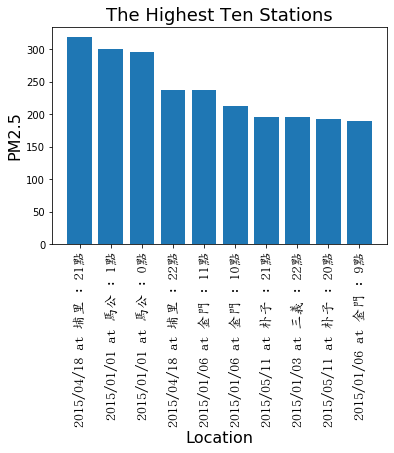

In [0]:
location = []
PMofLocation  = []
for x in PM25_10Highest:
  location.append(x[1])
  PMofLocation.append(x[0])

#print(location)
#print(PMofLocation)

#############################################################################################
#draw bar

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

#load font for Mandarin
my_font = FontProperties(fname='/content/drive/My Drive/colab/bkai00mp.ttf')

index = range(1,11)

plt.title("The highest ten stations", fontsize=18)
plt.bar(index, PMofLocation)
plt.xlabel('Location', fontsize=16)
plt.ylabel('PM2.5', fontsize=16)

#xticks returns locs and labels (stored them => will not print)
locs,labels = plt.xticks(index, location, rotation='vertical', fontproperties=my_font, fontsize=14)

#############################################################################################

# 練習3: 請算算看2015全國哪個測站，紫爆天數最多？
### 假設當日平均值大於60，則算該日該地區紫爆


In [0]:
#find the average OM2.5 of a day which is over 60
def find_Purple(x):
    total = 0
    flag = 0
    time = 0
    average = 0
    list_tmp=[]
    x_tmp = x[3:]
    x_tmp = list(map(int, x_tmp))
    
    for i, value in enumerate(x_tmp):
      #print(i, value)
      total += value
    average = total/24
    if average > 60:
      flag = 1
    list_tmp = [x[1], flag]
    return list_tmp

PM25_purple = PM25.map(find_Purple)
print(PM25_purple.top(10))

[['龍潭', 1], ['龍潭', 1], ['龍潭', 0], ['龍潭', 0], ['龍潭', 0], ['龍潭', 0], ['龍潭', 0], ['龍潭', 0], ['龍潭', 0], ['龍潭', 0]]


In [0]:
PM25_purple_result = PM25_purple.filter(lambda x: x[1]==1).reduceByKey(lambda x,y:x+y)
#Purple_dataset = PM25_purple_result.sortBy(lambda x: x[1],ascending=False).take(PM25_purple_result.count())

#for convenience of plot, here only takes 10 datas
Purple_dataset = PM25_purple_result.sortBy(lambda x: x[1],ascending=False).take(10)

Plot results.

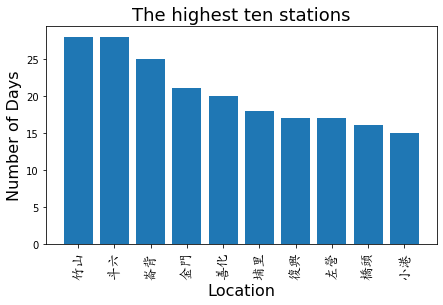

In [0]:
location = []
Day  = []
for x in Purple_dataset:
  location.append(x[0])
  Day.append(x[1])

#print(location)
#print(Day)

#############################################################################################
#draw bar

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

#load font for Mandarin
my_font = FontProperties(fname='/content/drive/My Drive/colab/bkai00mp.ttf')

index = range(len(location))
plt.figure(figsize=(7,4))
plt.title("The highest ten stations", fontsize=18)
plt.bar(index, Day)
plt.xlabel('Location', fontsize=16)
plt.ylabel('Number of Days', fontsize=16)

#xticks returns locs and labels (stored them => will not print)
locs,labels = plt.xticks(index, location, rotation='vertical', fontproperties=my_font, fontsize=14)

#############################################################################################

  According to the plot above, that **'竹山'** and **'斗六'** are  both the highest station whose PM2.5 is over 60.